# Analyse Exploratoire

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro

In [2]:
pd.set_option('display.max_row',918)
pd.set_option('display.max_column',12)

In [3]:
missing_values = ["n/a", "NaN", "--"]
df = pd.read_excel('Dataset.xlsx', na_values = missing_values)
df.head(15)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,DNA,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0
8,37,homme,ASY,140,207,0,Normal,130,Oui,1.5,Plat,1
9,48,femme,AA,120,284,0,Normal,120,Non,0.0,Ascendant,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [7]:
df.nunique()

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

## Visualisons des variables 

### Variables Quantitatives

In [8]:
Data_Quanti = df.select_dtypes(exclude=object)
Data_Quali = df.select_dtypes(object)

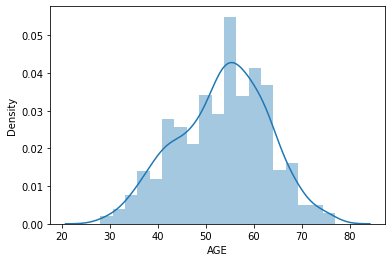

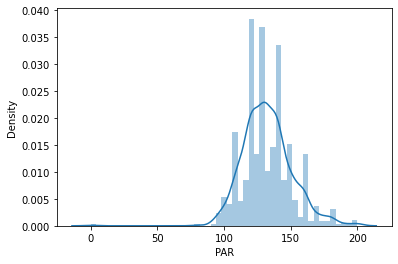

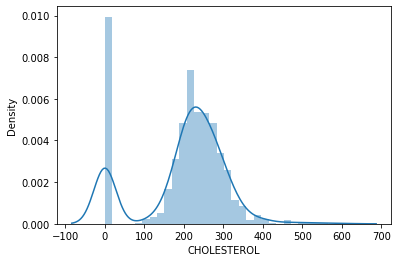

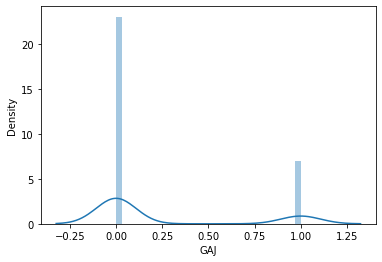

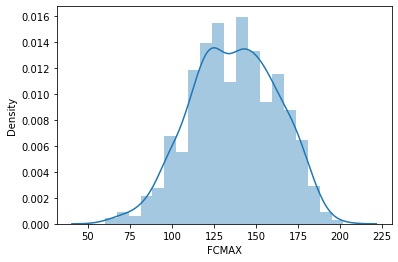

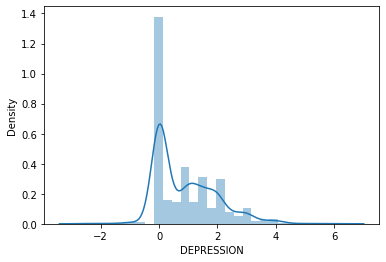

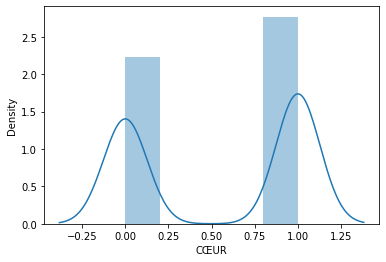

In [9]:
for col in Data_Quanti:
    plt.figure()
    sns.distplot(df[col])

In [40]:
for col in Data_Quanti:
    print(f"{shapiro(df[col])}\n")

ShapiroResult(statistic=0.9910159707069397, pvalue=2.1749523511971347e-05)

ShapiroResult(statistic=0.9580422639846802, pvalue=1.4945345782886414e-15)

ShapiroResult(statistic=0.8705924153327942, pvalue=6.972669126282614e-27)

ShapiroResult(statistic=0.5234582424163818, pvalue=3.783505853677006e-44)

ShapiroResult(statistic=0.992672860622406, pvalue=0.00016854831483215094)

ShapiroResult(statistic=0.8598771095275879, pvalue=8.269326883616587e-28)

ShapiroResult(statistic=0.6324208974838257, pvalue=2.3473991354983606e-40)



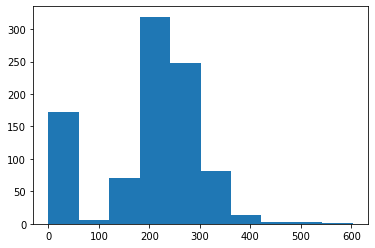

In [10]:
plt.hist(df['CHOLESTEROL'])
plt.show()

<AxesSubplot:xlabel='CHOLESTEROL'>

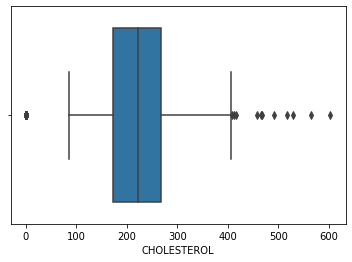

In [13]:
sns.boxplot( df['CHOLESTEROL'] )

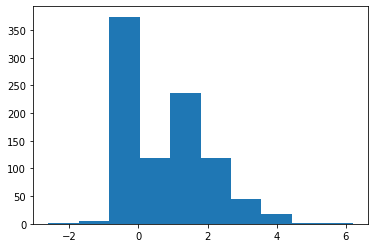

In [11]:
plt.hist(df['DEPRESSION'])
plt.show()

<AxesSubplot:xlabel='DEPRESSION'>

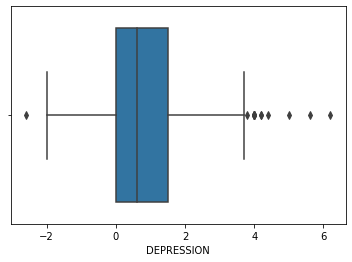

In [12]:
sns.boxplot( df['DEPRESSION'] )

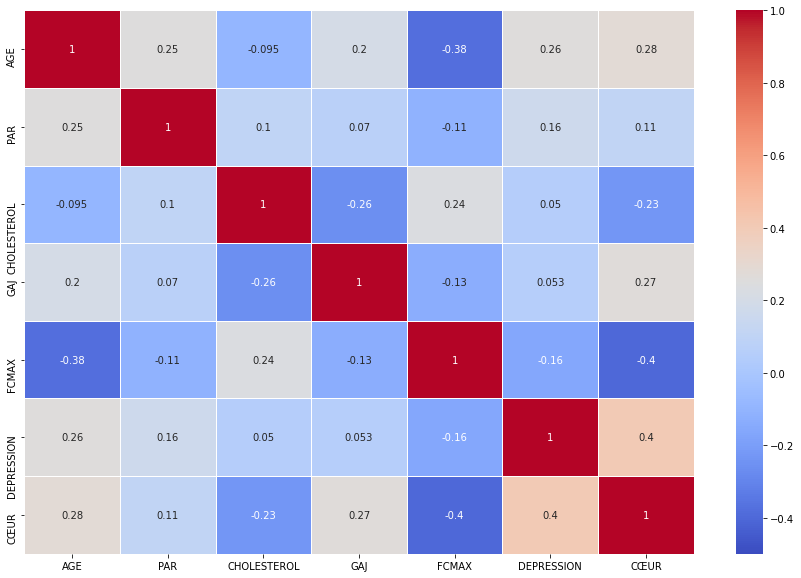

In [19]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot= True,vmin=-0.5,vmax=1, cmap='coolwarm',linewidths=0.75)
plt.show()

### Variables Qualitatives

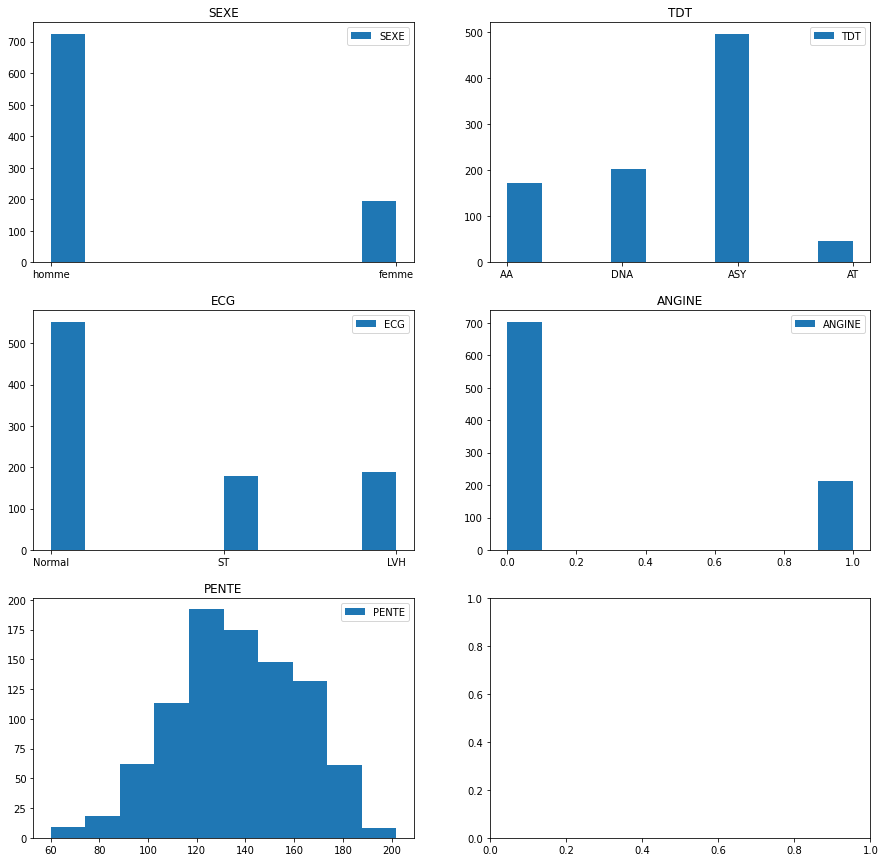

In [54]:
plt.rcParams["figure.figsize"] = 15, 15

fig, ax = plt.subplots(3, 2)

# 
ax[0, 0].hist(df.SEXE, label = "SEXE")
ax[0, 0].set_title("SEXE", size = 12)
ax[0, 0].legend()

ax[0, 1].hist(df.TDT, label = "TDT")
ax[0, 1].set_title("TDT", size = 12)
ax[0, 1].legend()


# 
ax[1, 0].hist(df.ECG,label = "ECG")
ax[1, 0].set_title("ECG", size = 12)
ax[1, 0].legend()

ax[1, 1].hist(df.GAJ, label = "ANGINE")
ax[1, 1].set_title("ANGINE", size = 12)
ax[1, 1].legend()


# 
ax[2, 0].hist(df.FCMAX, label = "PENTE")
ax[2, 0].set_title("PENTE", size = 12)
ax[2, 0].legend()

plt.show()

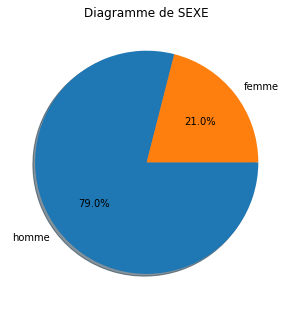

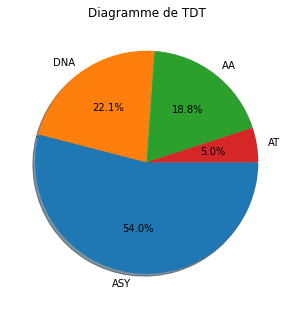

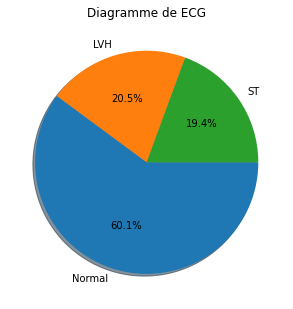

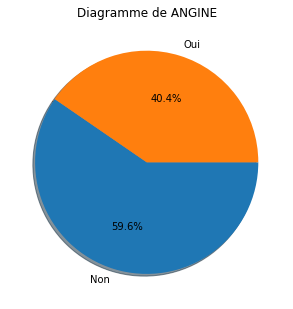

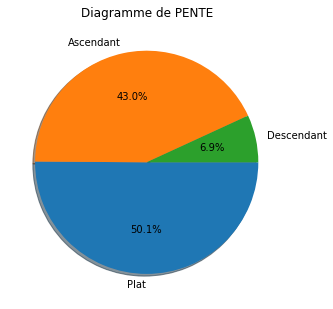

In [59]:
for col in Data_Quali:
    plt.figure(figsize=(5, 8))
    count = df[col].value_counts()
    plt.pie(count.values, labels=count.index, autopct='%1.1f%%',
            counterclock=False, shadow=True)
    plt.title(f'Diagramme de {col}')

    plt.show()

****************************************************

### Variables Quantitatives-Quantitatives

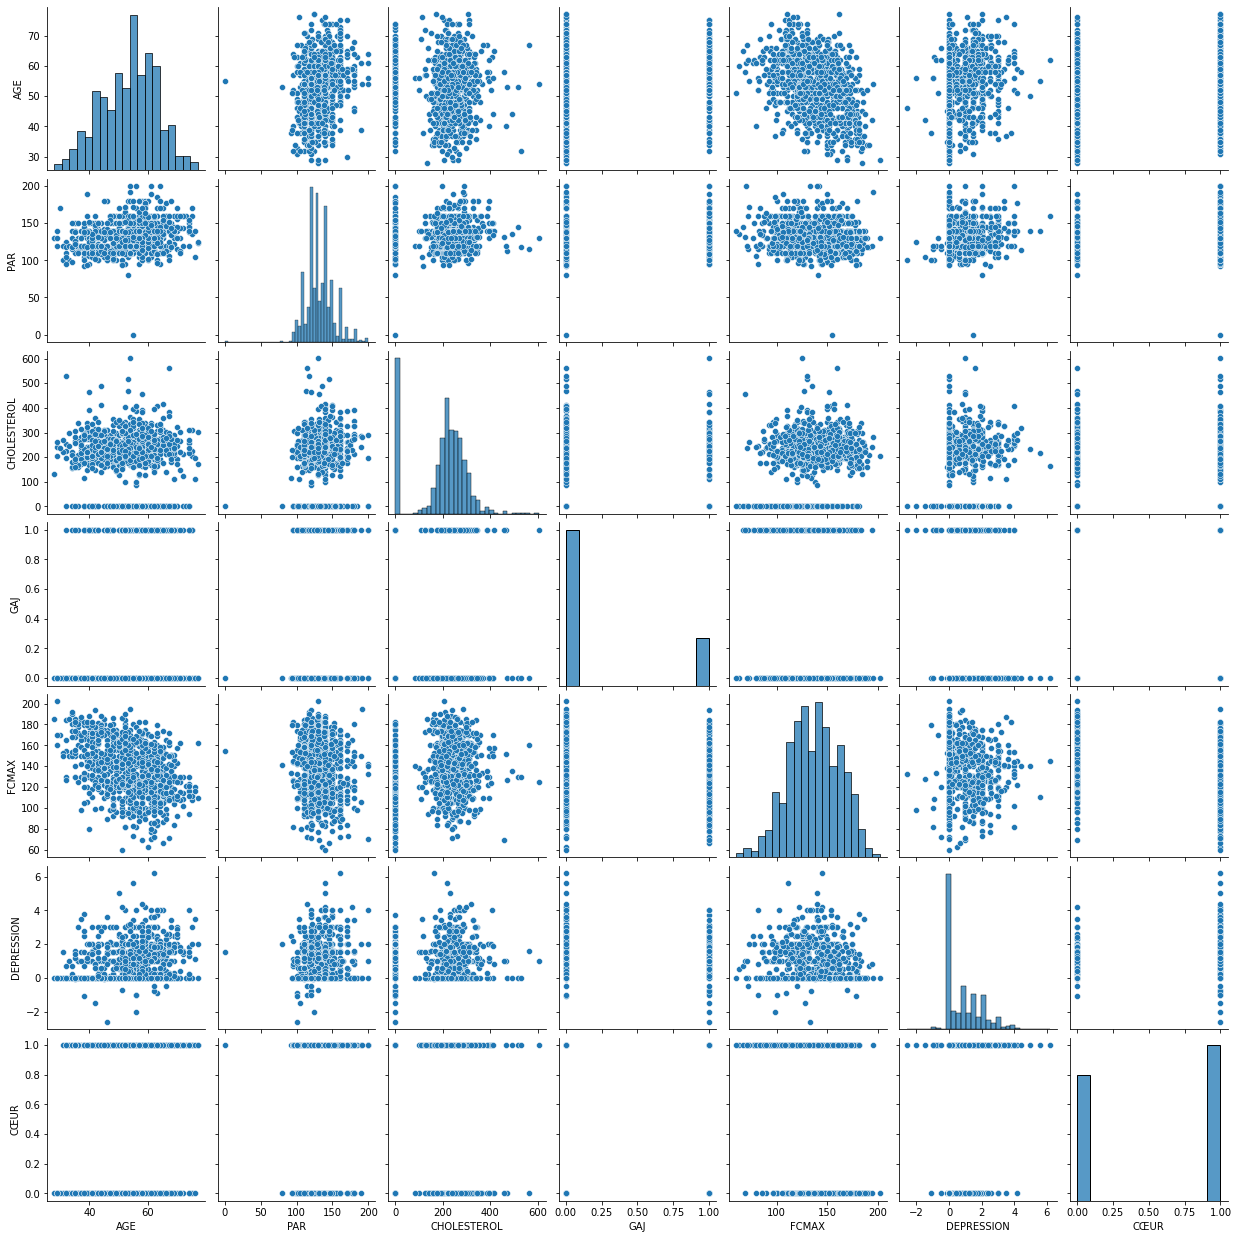

In [46]:
sns.pairplot(df)

### Variables Quantitatives-Qualitatives

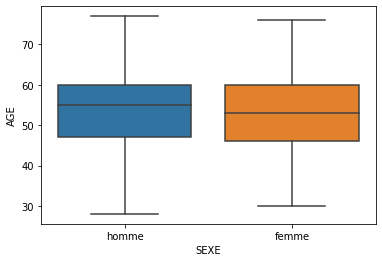

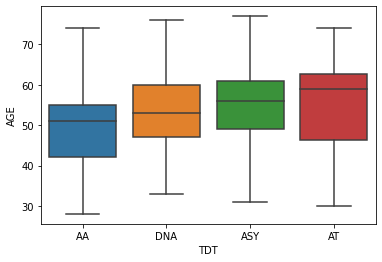

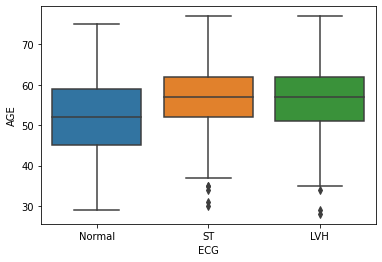

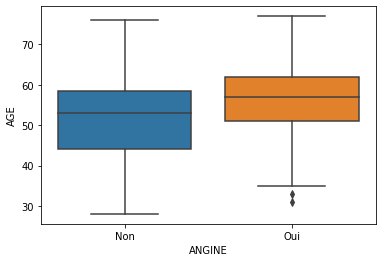

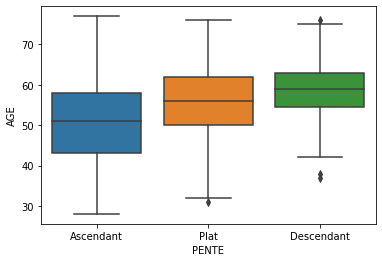

In [49]:
for i in Data_Quali:
    sns.boxplot(y="AGE", x=i, data=df)
    plt.show()

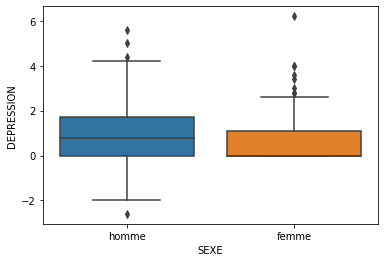

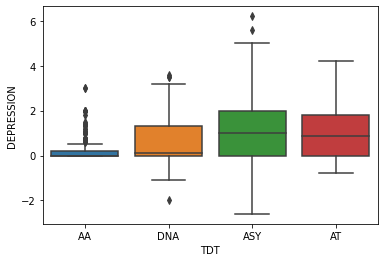

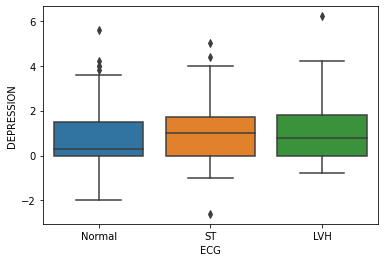

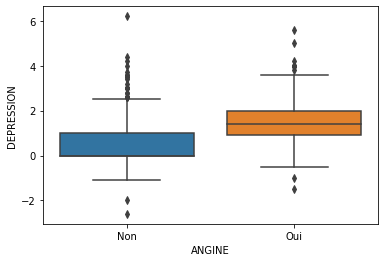

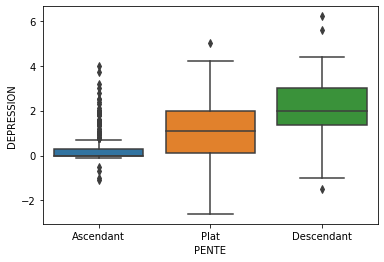

In [50]:
for i in Data_Quali:
    sns.boxplot(y="DEPRESSION", x=i, data=df)
    plt.show()

### Visualisons la variable cible

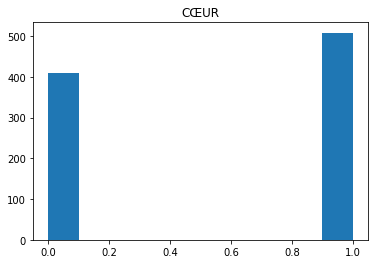

In [44]:
plt.hist(df['CŒUR'])
plt.title("CŒUR")
plt.show()

Text(0.5, 1.0, 'Diagramme de CŒUR')

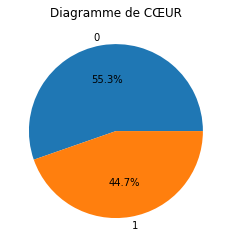

In [45]:
plt.figure()
plt.pie(df['CŒUR'].value_counts(), labels=df['CŒUR'].unique(), autopct='%.1f%%')
plt.title("Diagramme de " + col)

***********************************************************************************************

### Visualisons la rélation entre les variables quantitatives et la variable cible

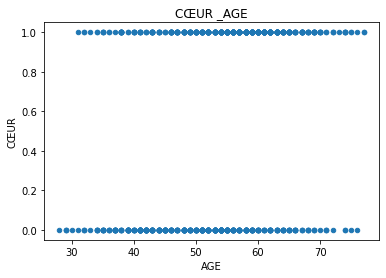

<Figure size 432x288 with 0 Axes>

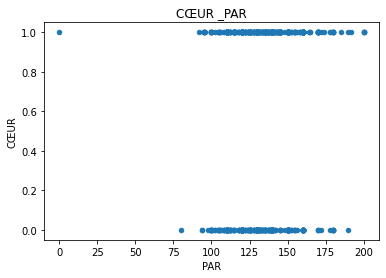

<Figure size 432x288 with 0 Axes>

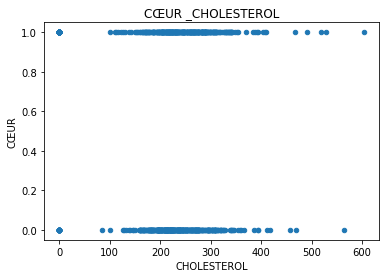

<Figure size 432x288 with 0 Axes>

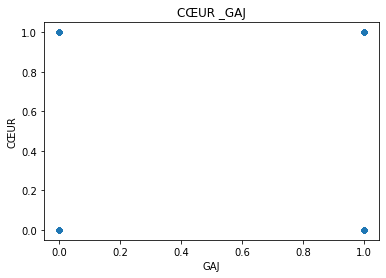

<Figure size 432x288 with 0 Axes>

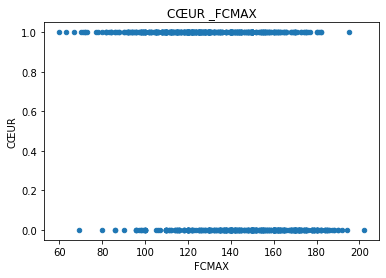

<Figure size 432x288 with 0 Axes>

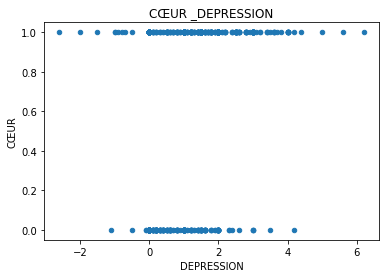

<Figure size 432x288 with 0 Axes>

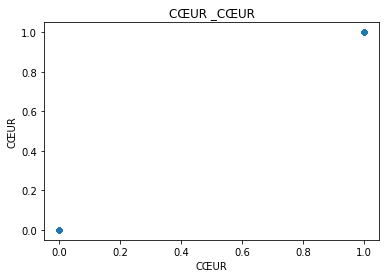

<Figure size 432x288 with 0 Axes>

In [26]:
for col in Data_Quanti.columns:
    Data_Quanti.plot.scatter(x=col, y='CŒUR')
    plt.title(f'CŒUR _{col}')
    plt.show()

### Visualisons la rélation entre les variables qualitatives et la variable cible

Text(0.5, 1.0, 'PENTE & CŒUR')

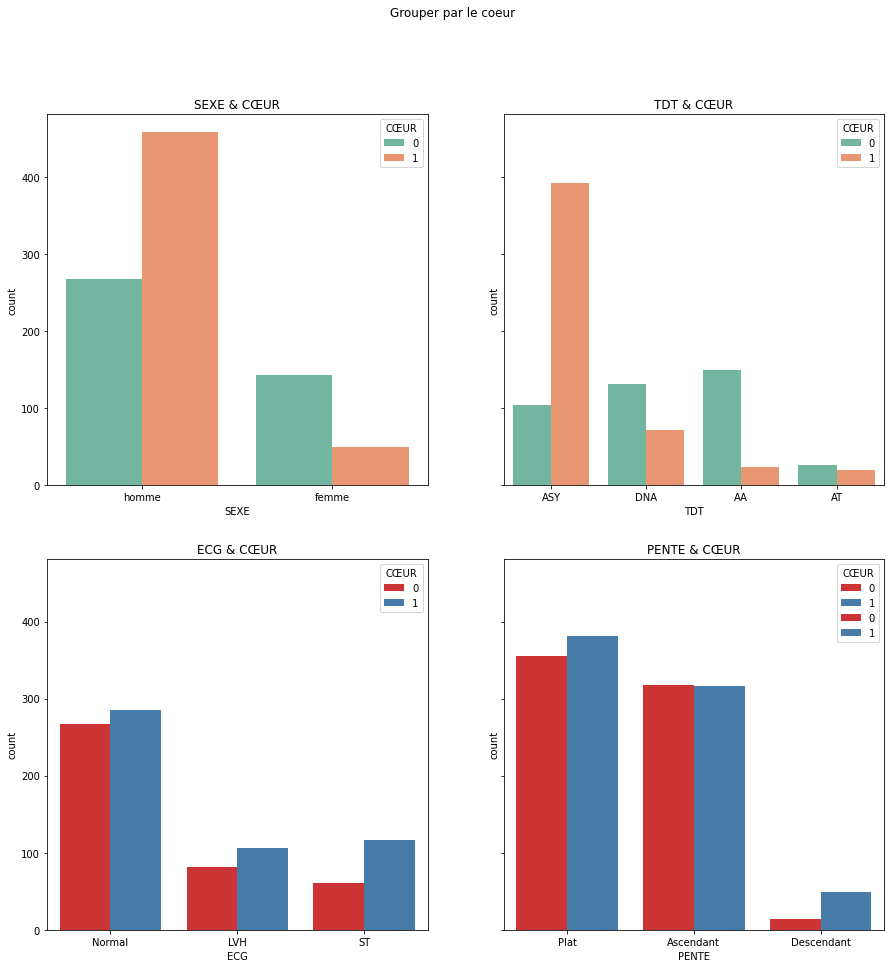

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Grouper par le coeur')
sns.countplot(x="SEXE", hue = "CŒUR",  data=df, ax=axes[0,0], palette="Set2")
axes[0,0].set_title("SEXE & CŒUR")

sns.countplot(x="TDT", hue = "CŒUR",  data=df, ax=axes[0,1], palette="Set2",order=df["TDT"].value_counts().index)
axes[0,1].set_title("TDT & CŒUR")

sns.countplot(x="ECG", hue = "CŒUR",  data=df, ax=axes[1,0], palette="Set1",order=df["ECG"].value_counts().index)
axes[1,0].set_title("ECG & CŒUR")

sns.countplot(x="ANGINE", hue = "CŒUR",  data=df, ax=axes[1,1], palette="Set1",order=df["ANGINE"].value_counts().index)
axes[1,1].set_title("ANGINE & CŒUR")

sns.countplot(x="PENTE", hue = "CŒUR",  data=df, ax=axes[1,1], palette="Set1",order=df["PENTE"].value_counts().index)
axes[1,1].set_title("PENTE & CŒUR")

In [ ]:
cor_targ['Adj Close'].sort_values(ascending=True)

<AxesSubplot:xlabel='AGE', ylabel='SEXE'>

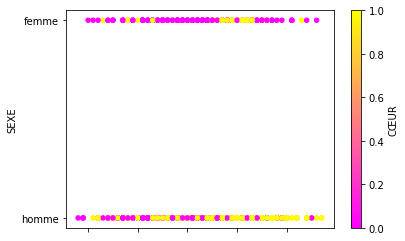

In [51]:
df.plot.scatter(x='AGE', y='SEXE',c='CŒUR', colormap='spring')

## Contexte
- Les maladies cardiovasculaires sont la première cause de décès dans le monde, faisant environ 17,9 millions de vies chaque année, ce qui represente 31% de tous les décès dans le monde. Quatre décès sur 5 par MCV sont dus à des crises cardiaques et à des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes de moins de 70 ans. 
- L'insuffisance cardiaque est un événement courant causé par les maladies cardiovasculaires et cet ensemble de données contient 11 caractéristiques qui peuvent être utilisées pour prédire une éventuelle maladie cardiaque.
- Les personnes atteintes de maladies cardiovasculaires ou à haut risque cardiovasculaire (en raison de la présence d un ou plusieurs facteurs de risque tels que l hypertension, le diabète, l'hyperlipidémie ou une maladie déjà établie) ont besoin d une détection et d une gestion précoces dans lesquelles un modèle d apprentissage automatique peut être d une grande aide.

## Objectif :
- Comprendre du mieux possible nos données 
- Utiliser différentes techniques d'analyse de données et machine learning pour faire la prédiction d'une maladie cardiaque chez un patient.

## Checklist de base
#### Analyse de Forme :
- **variable target** : coeur

- Le contexte du projet nous dit qu'un tier des maladies cardio vasculaires subviennent chez les personnes de moins de moins de 70 ans ( c'est une hypothèse que nous allons vérifié plutard)

- **lignes et colonnes** : 918 lignes, 12 colonnes signifiant qu'il y a 918 enrégistrements de clients sur 12 caractéristiques.

- **types de variables** : A l'affichage des informations du dataset, on remarque qu'il y a, à priori, des variables de type int64(6), float64(1) et object(5)

- **Existe t-il des valeurs manquantes ?** : Notre jeu de données ne comportent aucune donnée manquante. 

- **Existe t-il des valeurs dupliquées ?** : Il n'y a pas de valeurs dupliquées

- **Existe t-il des valeurs constantes ?** : Il n'y a pas de valeurs constantes.

- Séparons nos variables quantitatives et qualitatives

- **Distribution des variables quantitatives** : A vue d'oeil,nous remarquons que les variables 'CHOLESTEROL' et 'DEPRESSION' ont une distribution plus différentes que les autres. Fesons un test de shapiro-wilk pour vérifier cette hypothèse. 
* Le test montre que ses deux variables ('CHOLESTEROL' et 'DEPRESSION') ne suivent pas une distribution normale.
* Regardons de plus prêt ses deux variables. En fesant un histogramme sur la variable 'CHOLESTEROL', on remarque qu'il y a plus de 300 patients qui ont un taux de cholestérol compris entre 180 mm/dl et 250 mm/dl.Quand à la variable "DEPRESSION", lorsqu'elle avoisine -1 elle comporte plus de patients. 

- **Visualisation des variables qualitatives** : Nous remarquons qu'il y a dans notre dataset:
* Plus d'hommes (79%) que de femmes (21%)
* Plus de patient ayant une douleur thoracique de type asymptomatique(54%), que d'autres types de patient ayant d'autres types de douleurs .La présence d'angine est-elle un facteur qui cause la maladie cardiaque ?
* La pente du segment ST est le plus souvent Plat (50.1%) que Ascendant(43%) et que Descendant(6,9%). Y a t'il un facteur qui influe sur cette variable ? Est-elle une variable importante vis à vis de la variable cible ?
* L'électrocardiogramme au repos est le plus souvent normal
* Moins de patient ayant une angine induite par l'exercise(40,4%)que ceux ayant une angine non induite par l'exercise.

- **Visualisation des variables Quantitatives-Quantitatives**: Les différentes répresentations montrent qu'il n'y a pas une rélation linéaire entre nos variables quantitatives. Mais alors, quelle est la rélation qui lit nos variables ? 

- **Visualisation des variables Quantitatives-Qualitatives**: Ici, voyons l'impacte de l'age sur les caractéristiques observées chez le patient.
* On observe que dans notre dataset, les hommes sont plus agés que les femmes.
* Les patients atteint de d'angine typique sont plus agés que les autres. Les patients souffrant de douleurs asymptomatiques (étant les plus nombreux)ont un age minimum de 





